# Import libs

In [2]:
library('igraph')
library('Matrix')
library('pracma')

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'Matrix' was built under R version 3.6.3"Warning message:
"package 'pracma' was built under R version 3.6.3"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



# P 1.2 - Create networks using preferential attachment model

**a)** Create an undirected network with $n = 1000$ nodes, with preferential attachment model, where each new node attaches to $m = 1$ old nodes. Is such a network always connected?

In [2]:
# g1 = barabasi.game(1000, m=1, directed=F)
g_1m_1000n <- sample_pa(1000, m=1, directed=FALSE)
is.connected(g_1m_1000n)

[1] TRUE

Note: yes, PA model is always connected by construction. Can be proven with induction. Also was mentioned in TA discussion section.

**b)** Use fast greedy method to find the community structure. Measure modularity.

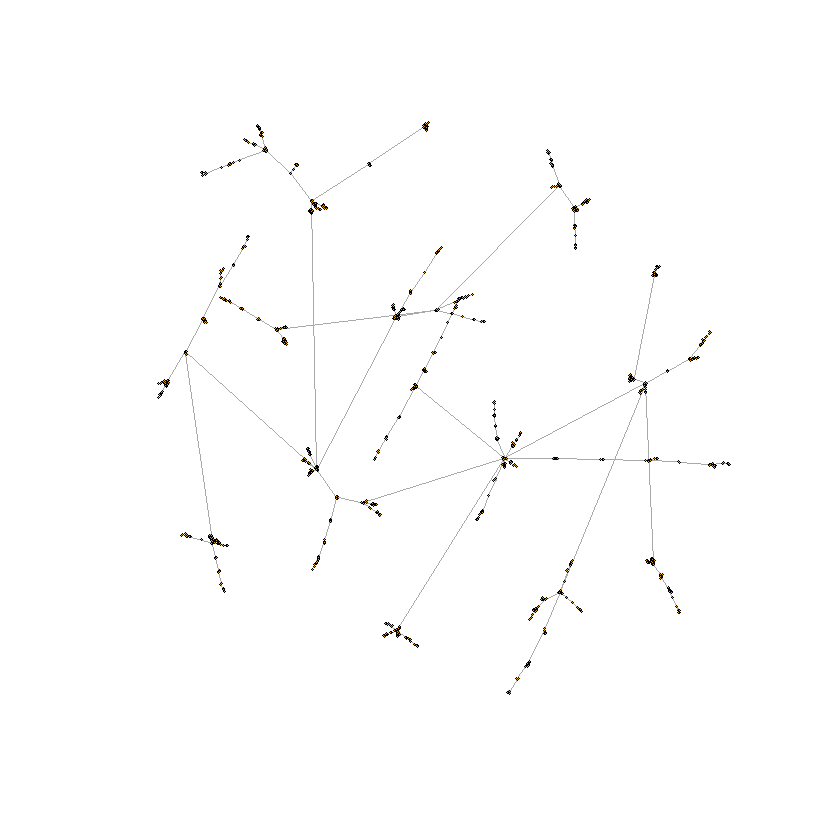

In [5]:
# let's plot the graph for reference
plot(g_1m_1000n, vertex.size=1, vertex.label=NA)

In [5]:
clusters_1m_1000n <- cluster_fast_greedy(g_1m_1000n)
print(modularity(clusters_1m_1000n))

[1] 0.9300622


We expect several really big cluster with low probability of having several other very small ones. This is because of PA model construction rules: nodes that already have high degree have higher probability to increase degree even more, which results in several nodes getting most of the connections.

We also expect modularity close to 1 because fast greedy algorithm resembles PA model construction so should perfrom really well.

**c)** Try to generate a larger network with 10000 nodes using the same model. Compute
modularity. How is it compared to the smaller network's modularity?

[1] 0.9784681


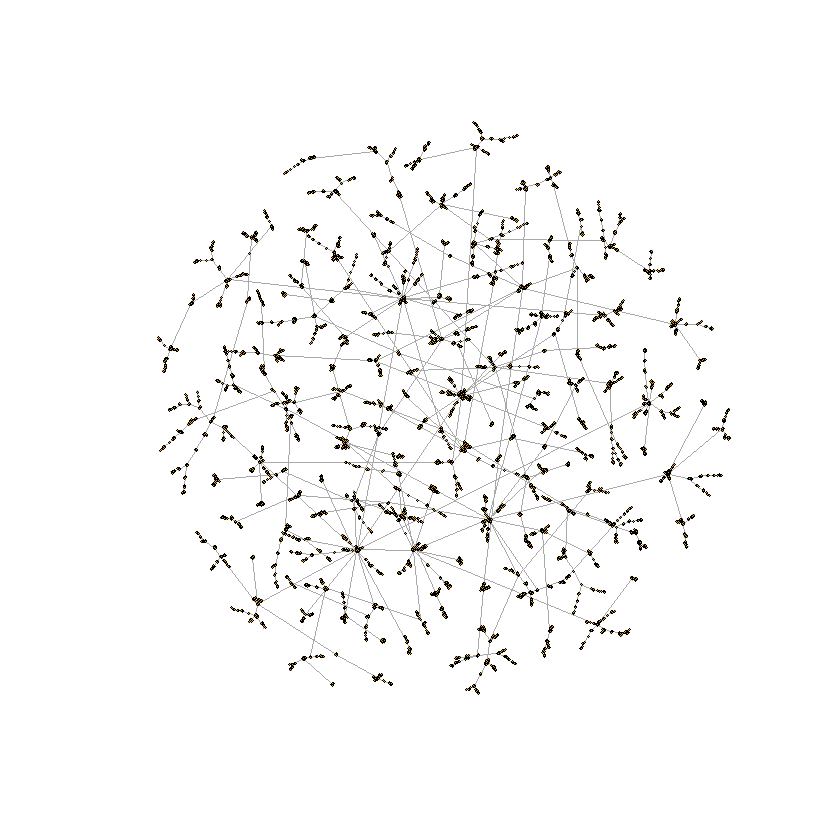

In [35]:
g_1m_10000n <- sample_pa(10000, m=1, directed=FALSE)
plot(g_1m_10000n, vertex.size=1, vertex.label=NA)
clusters2 <- cluster_fast_greedy(g_1m_10000n)
print(modularity(clusters2))

We can expect even more clusters whith bigger size (by construction). They will be even easier to notice (since they are larger).

**d)** Plot the degree distribution in a log-log scale for both n = 1000; 10000, then estimate the slope of the plot using linear regression.

Let's consider $n = 1000$ first.

In [50]:
# get degrees present in a net along with frequencies with which they appear
degrees <- seq_along(degree.distribution(g_1m_1000n)) - 1
distribution <- degree.distribution(g_1m_1000n)
# convert them to collections and then to matrices
X <- matrix(c(degrees), byrow=TRUE, nrow=1)
Y <- matrix(c(distribution), byrow=TRUE, nrow=1)
# delete entries with zero frequencies from both matrices
# this allows to avoid - infinity values after log scaling and makes sense
# as these data is not actually present in the net
indices = which(Y!=0,arr.ind = T)
X <- X[indices]
Y <- Y[indices]
# log scale data
X <- log(X)
Y <- log(Y)
# select how many elements you want to delete from the end to avoid outliners
delete <- 0
# calculate len of the desired array
len <- size(X)[2] - delete
# get the slices of both matrices
X <- X[0:len]
Y <- Y[0:len]

In [51]:
# train linear regression model on the data
model = lm(Y ~ X)

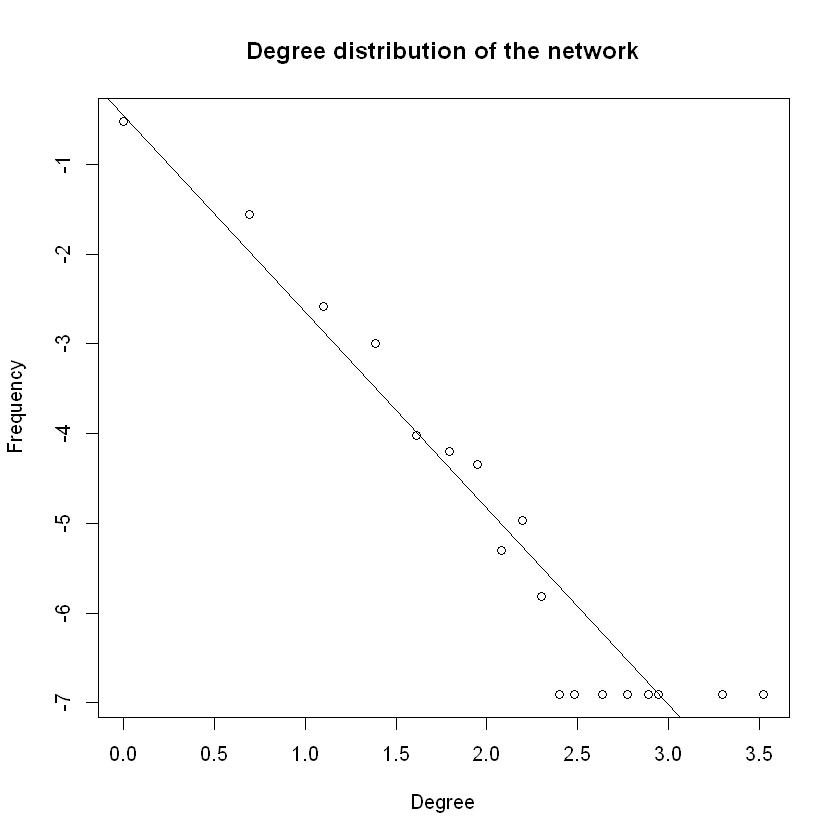

In [52]:
# plot for reference
plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

In [53]:
# save plot
png(file="plots/1_2_d_1m_1000n.png", width=600, height=450)

plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

dev.off()

png 
  2

In [15]:
# print model summary
# coefficient we are looking for is X estimate. 
summary(model)


Call:
lm(formula = Y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.20183 -0.30582 -0.02107  0.35762  1.26512 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.4639     0.3808  -1.218    0.241    
X            -2.1861     0.1661 -13.158 5.36e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6237 on 16 degrees of freedom
Multiple R-squared:  0.9154,	Adjusted R-squared:  0.9101 
F-statistic: 173.1 on 1 and 16 DF,  p-value: 5.36e-10


As we can see, the result is a little bit less than $3$. The reason behind deviation from 3 is that Preferential attachment model follows power law degree distribution only in stable case, i.e. when there is infinitely many nodes $t \rightarrow +\infty$.

Now let's consider $n = 10000$. We can expect coefficient closer to $3$ as the number of nodes increased.

In [45]:
# get degrees present in a net along with frequencies with which they appear
degrees <- seq_along(degree.distribution(g_1m_10000n)) - 1
distribution <- degree.distribution(g_1m_10000n)
# convert them to collections and then to matrices
X <- matrix(c(degrees), byrow=TRUE, nrow=1)
Y <- matrix(c(distribution), byrow=TRUE, nrow=1)
# delete entries with zero frequencies from both matrices
# this allows to avoid - infinity values after log scaling and makes sense
# as these data is not actually present in the net
indices = which(Y!=0,arr.ind = T)
X <- X[indices]
Y <- Y[indices]
# log scale data
X <- log(X)
Y <- log(Y)
# select how many elements you want to delete from the end to avoid outliners
delete <- 0
# calculate len of the desired array
len <- size(X)[2] - delete
# get the slices of both matrices
X <- X[0:len]
Y <- Y[0:len]

In [46]:
# train linear regression model on the data
model = lm(Y ~ X)

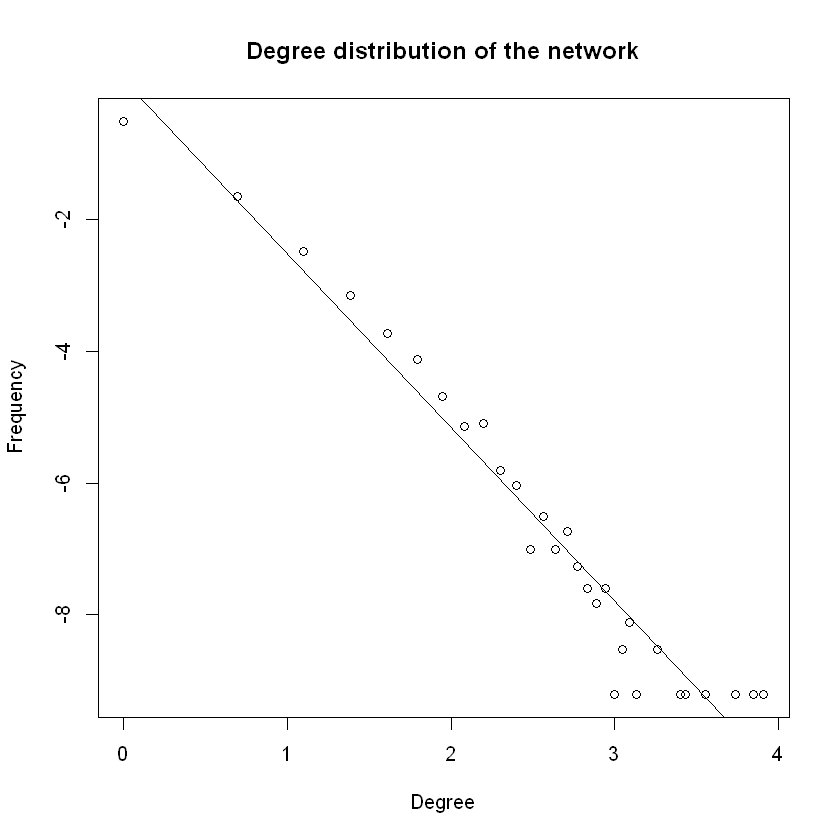

In [47]:
# plot for reference
plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

In [49]:
# save plot
png(file="plots/1_2_d_1m_10000n.png", width=600, height=450)

plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

dev.off()

png 
  2

In [40]:
# print model summary
# coefficient we are looking for is X estimate. 
summary(model)


Call:
lm(formula = Y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43378 -0.27222  0.05488  0.32421  0.98113 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.1188     0.2881   0.412    0.683    
X            -2.6355     0.1060 -24.856   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5318 on 28 degrees of freedom
Multiple R-squared:  0.9566,	Adjusted R-squared:  0.9551 
F-statistic: 617.8 on 1 and 28 DF,  p-value: < 2.2e-16


As we can see, $b_{10000} \approx 2.63 > b_{1000} \approx 2.18$, which confirms our expectations.

**e)** In the two networks generated in **d)**, perform the following:

Randomly pick a node $i$, and then randomly pick a neighbor $j$ of that node. Plot the degree distribution of nodes $j$ that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?

In [30]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [32]:
generate_mask <- function(vector_w_zeros) {
    # function that generates mask, which removes zero values from the vector
    # find which indices we need to remove
    to_remove <- which(vector_w_zeros == 0)
    # initialize mask
    mask <- c(ones(1, length(vector_w_zeros)))
    # mark elements we need to remove in the mask
    for (i in 1:length(vector_w_zeros)) {
        if (is.element(i, to_remove)) {
            mask[i] <- 0
        }
    }
    # convert mask to boolean
    mask <- mask > 0.5
    return(mask)
}

[1] 28



Call:
lm(formula = Y[mask] ~ X[mask])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08819 -0.34072  0.09347  0.45386  0.80400 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.3328     0.3382  -3.941 0.000876 ***
X[mask]      -1.0342     0.1447  -7.146 8.59e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5486 on 19 degrees of freedom
Multiple R-squared:  0.7288,	Adjusted R-squared:  0.7145 
F-statistic: 51.06 on 1 and 19 DF,  p-value: 8.595e-07


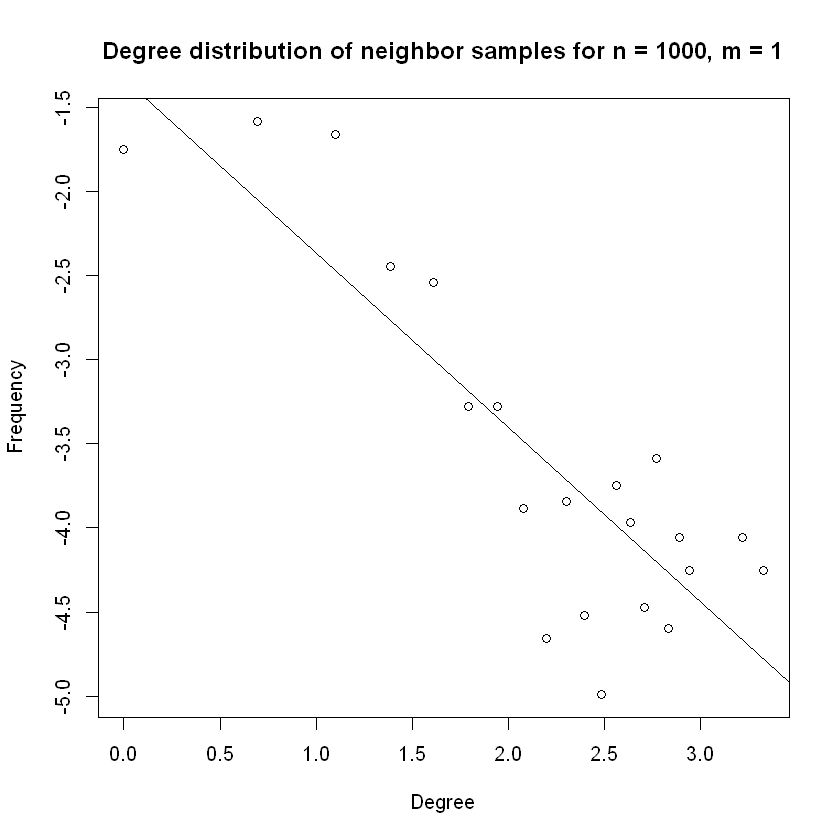

In [105]:
numOfExamples = 10000
numOfGraphs = 1

v = 1
num = 0
transition_matrix = create_transition_matrix(g2)
PMF = transition_matrix[1, ]
degreeSecondGraph = matrix(data = 0, nrow = numOfGraphs*numOfExamples, ncol = 1)



for(k in 1:numOfGraphs){
    g2 <- sample_pa(1000, m=1, directed=FALSE)
    for(i in 1:numOfExamples){
             v = sample(1:vcount(g2), 1)
             j = neighbors(g2, v, mode = c("all"))
             #print(j)
             #print(v)
             size = length(j)
             #print("Size: ")
             #print(size)
             num = sample(1:size, 1)
             if (num == 0) {
                num = 1
                }
             #print("Num: ")
             #print(num)

             degreeSecondGraph[i*k] = degree(g2,j[num])
            }
    
}
print(max(degreeSecondGraph))
X = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)
freqSecond = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)

for(i in 1:(numOfExamples*numOfGraphs)){
    freqSecond[degreeSecondGraph[i]] = freqSecond[degreeSecondGraph[i]] + 1
    X[i] = i 
}
inc = 0
#print(freqSecond)
for(i in 1:max(degreeSecondGraph)){
    if(freqSecond[i] != 0){
        inc = inc + 1
        freqSecond[inc] = freqSecond[i]
        X[inc] = i
        } 
    }
freqSecond = freqSecond/(numOfExamples*numOfGraphs)
#print(freqSecond)
Y <- log(freqSecond)
X <- log(idx <- seq(from = 1, to = length(Y), by = 1))


for (i in 1:length(Y)){
    if(Y[i] == -Inf){
        Y[i] = 0
    }   
}

mask <- generate_mask(Y)


model = lm(Y[mask] ~ X[mask])
plot(X[mask], Y[mask],
     main="Degree distribution of neighbor samples for n = 1000, m = 1",
     xlab="Degree",
     ylab="Frequency",)
abline(model)
summary(model)

[1] 54



Call:
lm(formula = Y[mask] ~ X[mask])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26786 -0.38523  0.06429  0.43328  1.05930 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.5231     0.3045  -1.718   0.0949 .  
X[mask]      -1.6467     0.1079 -15.266   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5705 on 34 degrees of freedom
Multiple R-squared:  0.8727,	Adjusted R-squared:  0.8689 
F-statistic:   233 on 1 and 34 DF,  p-value: < 2.2e-16


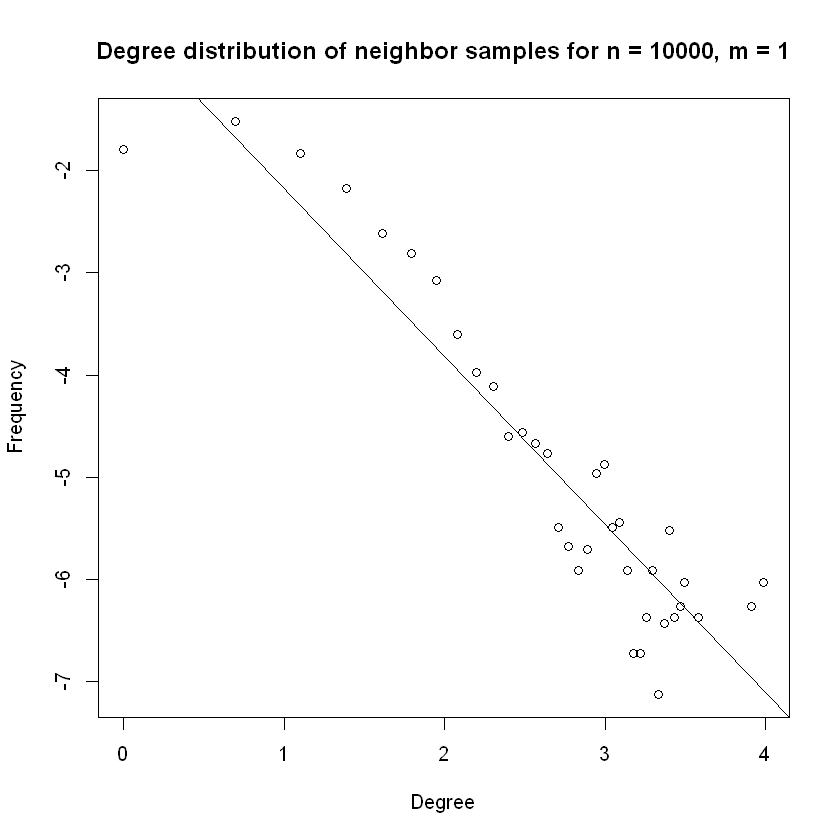

In [104]:
numOfExamples = 10000
numOfGraphs = 1

v = 1
num = 0
transition_matrix = create_transition_matrix(g2)
PMF = transition_matrix[1, ]
degreeSecondGraph = matrix(data = 0, nrow = numOfGraphs*numOfExamples, ncol = 1)



for(k in 1:numOfGraphs){
    g2 <- sample_pa(10000, m=1, directed=FALSE)
    for(i in 1:numOfExamples){
             v = sample(1:vcount(g2), 1)
             j = neighbors(g2, v, mode = c("all"))
             #print(j)
             #print(v)
             size = length(j)
             #print("Size: ")
             #print(size)
             num = sample(1:size, 1)
             if (num == 0) {
                num = 1
                }
             #print("Num: ")
             #print(num)

             degreeSecondGraph[i*k] = degree(g2,j[num])
            }
    
}
print(max(degreeSecondGraph))
X = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)
freqSecond = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)

for(i in 1:(numOfExamples*numOfGraphs)){
    freqSecond[degreeSecondGraph[i]] = freqSecond[degreeSecondGraph[i]] + 1
    X[i] = i 
}
inc = 0
#print(freqSecond)
for(i in 1:max(degreeSecondGraph)){
    if(freqSecond[i] != 0){
        inc = inc + 1
        freqSecond[inc] = freqSecond[i]
        X[inc] = i
        } 
    }
freqSecond = freqSecond/(numOfExamples*numOfGraphs)
#print(freqSecond)
Y <- log(freqSecond)
X <- log(idx <- seq(from = 1, to = length(Y), by = 1))


for (i in 1:length(Y)){
    if(Y[i] == -Inf){
        Y[i] = 0
    }   
}

mask <- generate_mask(Y)


model = lm(Y[mask] ~ X[mask])
plot(X[mask], Y[mask],
     main="Degree distribution of neighbor samples for n = 10000, m = 1",
     xlab="Degree",
     ylab="Frequency",)
abline(model)
summary(model)

[1] 87



Call:
lm(formula = Y[mask] ~ X[mask])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7191 -0.5189  0.2982  0.6694  0.9518 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0556     0.3971   2.659  0.00966 ** 
X[mask]      -2.7742     0.1144 -24.249  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8963 on 72 degrees of freedom
Multiple R-squared:  0.8909,	Adjusted R-squared:  0.8894 
F-statistic:   588 on 1 and 72 DF,  p-value: < 2.2e-16


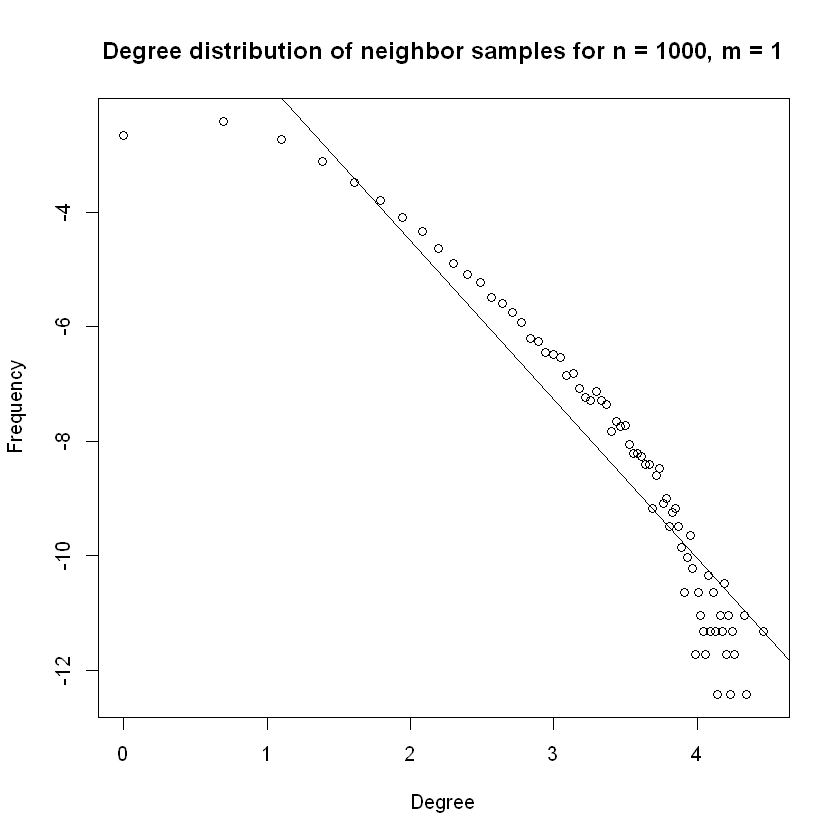

In [93]:
numOfExamples = 50
numOfGraphs = 5000
g2 <- sample_pa(1000, m=1, directed=FALSE)
v = 1
num = 0
transition_matrix = create_transition_matrix(g2)
PMF = transition_matrix[1, ]
degreeSecondGraph = matrix(data = 0, nrow = numOfGraphs*numOfExamples, ncol = 1)



for(k in 1:numOfGraphs){
    g2 <- sample_pa(1000, m=1, directed=FALSE)
    for(i in 1:numOfExamples){
             v = sample(1:vcount(g2), 1)
             j = neighbors(g2, v, mode = c("all"))
             #print(j)
             #print(v)
             size = length(j)
             #print("Size: ")
             #print(size)
             num = sample(1:size, 1)
             if (num == 0) {
                num = 1
                }
             #print("Num: ")
             #print(num)

             degreeSecondGraph[i*k] = degree(g2,j[num])
            }
    
}
print(max(degreeSecondGraph))
X = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)
freqSecond = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)

for(i in 1:(numOfExamples*numOfGraphs)){
    freqSecond[degreeSecondGraph[i]] = freqSecond[degreeSecondGraph[i]] + 1
    X[i] = i 
}
inc = 0
#print(freqSecond)
for(i in 1:max(degreeSecondGraph)){
    if(freqSecond[i] != 0){
        inc = inc + 1
        freqSecond[inc] = freqSecond[i]
        X[inc] = i
        } 
    }
freqSecond = freqSecond/(numOfExamples*numOfGraphs)
#print(freqSecond)
Y <- log(freqSecond)
X <- log(idx <- seq(from = 1, to = length(Y), by = 1))


for (i in 1:length(Y)){
    if(Y[i] == -Inf){
        Y[i] = 0
    }   
}

mask <- generate_mask(Y)


model = lm(Y[mask] ~ X[mask])
plot(X[mask], Y[mask],
     main="Degree distribution of neighbor samples for n = 1000, m = 1",
     xlab="Degree",
     ylab="Frequency",)
abline(model)
summary(model)

[1] 143



Call:
lm(formula = Y[mask] ~ X[mask])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6413 -0.3461  0.1853  0.3942  0.7870 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.9511     0.2070   4.596 9.85e-06 ***
X[mask]      -2.6542     0.0511 -51.939  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.56 on 134 degrees of freedom
Multiple R-squared:  0.9527,	Adjusted R-squared:  0.9523 
F-statistic:  2698 on 1 and 134 DF,  p-value: < 2.2e-16


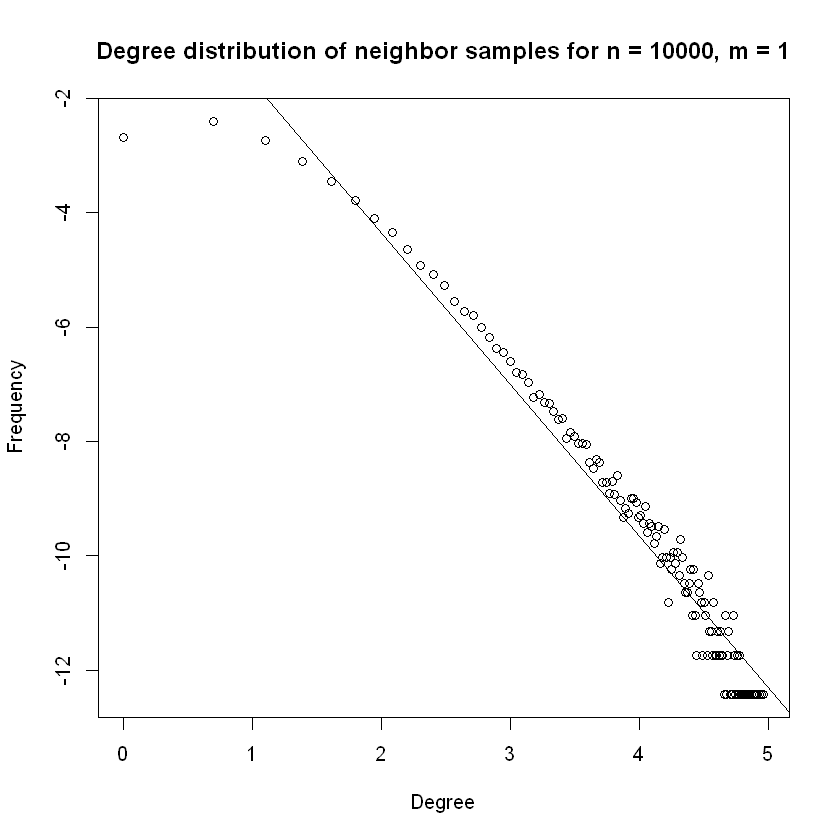

In [99]:
numOfExamples = 50
numOfGraphs = 5000

v = 1
num = 0
transition_matrix = create_transition_matrix(g2)
PMF = transition_matrix[1, ]
degreeSecondGraph = matrix(data = 0, nrow = numOfGraphs*numOfExamples, ncol = 1)



for(k in 1:numOfGraphs){
    g2 <- sample_pa(10000, m=1, directed=FALSE)
    for(i in 1:numOfExamples){
             v = sample(1:vcount(g2), 1)
             j = neighbors(g2, v, mode = c("all"))
             #print(j)
             #print(v)
             size = length(j)
             #print("Size: ")
             #print(size)
             num = sample(1:size, 1)
             if (num == 0) {
                num = 1
                }
             #print("Num: ")
             #print(num)

             degreeSecondGraph[i*k] = degree(g2,j[num])
            }
    
}
print(max(degreeSecondGraph))
X = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)
freqSecond = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)

for(i in 1:(numOfExamples*numOfGraphs)){
    freqSecond[degreeSecondGraph[i]] = freqSecond[degreeSecondGraph[i]] + 1
    X[i] = i 
}
inc = 0
#print(freqSecond)
for(i in 1:max(degreeSecondGraph)){
    if(freqSecond[i] != 0){
        inc = inc + 1
        freqSecond[inc] = freqSecond[i]
        X[inc] = i
        } 
    }
freqSecond = freqSecond/(numOfExamples*numOfGraphs)
#print(freqSecond)
Y <- log(freqSecond)
X <- log(idx <- seq(from = 1, to = length(Y), by = 1))


for (i in 1:length(Y)){
    if(Y[i] == -Inf){
        Y[i] = 0
    }   
}

mask <- generate_mask(Y)


model = lm(Y[mask] ~ X[mask])
plot(X[mask], Y[mask],
     main="Degree distribution of neighbor samples for n = 10000, m = 1",
     xlab="Degree",
     ylab="Frequency",)
abline(model)
summary(model)

**f)** Estimate the expected degree of a node that is added at time step $i$ for $1 \leq i \leq 1000$. Show the relationship between the age of nodes and their expected degree through an appropriate plot.

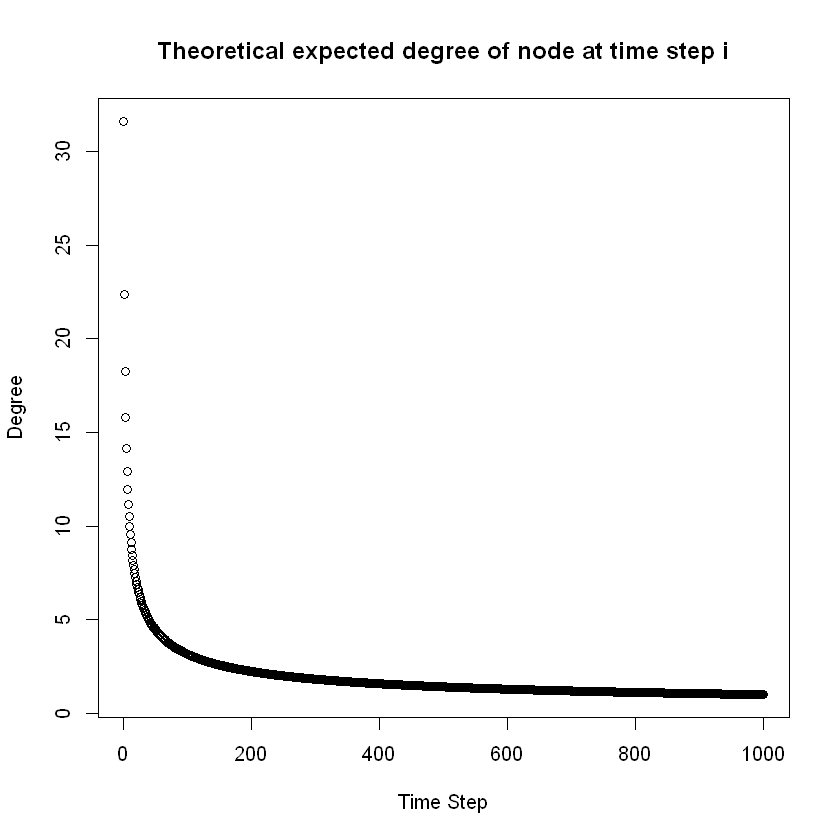

In [133]:
X = matrix(data = 0, nrow = 1, ncol = 1)
K = matrix(data = 0, nrow = 1, ncol = 1)
for(i in 1:1000){
    X[i] = i
    K[i] = sqrt((1000)/i)
    }
plot(X, K,
     main="Theoretical expected degree of node at time step i",
     xlab="Time Step",
     ylab="Degree",)

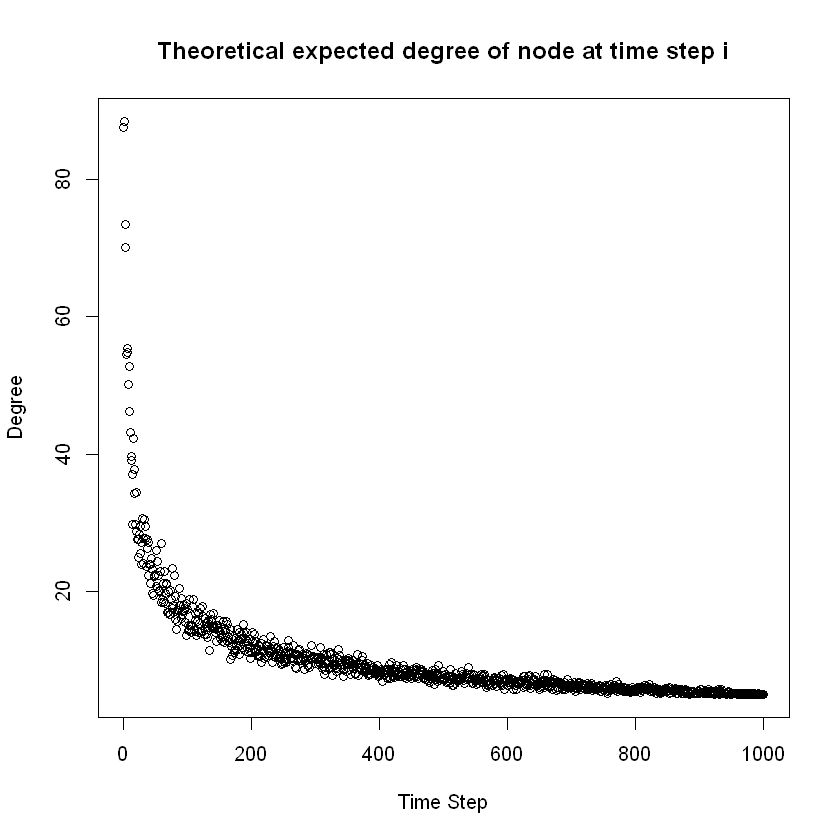

In [134]:
empK = matrix(data = 0, nrow = 1000, ncol = 1)
totalEmpK = matrix(data = 0, nrow = 1000, ncol = 1)
g <- sample_pa(1000, m=1, directed=FALSE)
for(j in 1:50){
    g <- sample_pa(1000, m=1, directed=FALSE)
    for(i in 1:1000){
        
         empK[i] = degree(g, v = i)
         
        }
    totalEmpK = totalEmpK + empK
}
totalEmpK = totalEmpK/10
plot(X, totalEmpK,
     main="Theoretical expected degree of node at time step i",
     xlab="Time Step",
     ylab="Degree",)

**g)** Repeat the previous parts for $m = 2$; and $m = 5$. Compare the results of each part for different values of $m$.

In [9]:
g_2m_1000n <- sample_pa(1000, m=2, directed=FALSE)
g_5m_1000n <- sample_pa(1000, m=5, directed=FALSE)

is.connected(g_2m_1000n)
is.connected(g_5m_1000n)

[1] TRUE

[1] TRUE

Obviously, both the $m=2$ and $m=5$ graphs are connected.

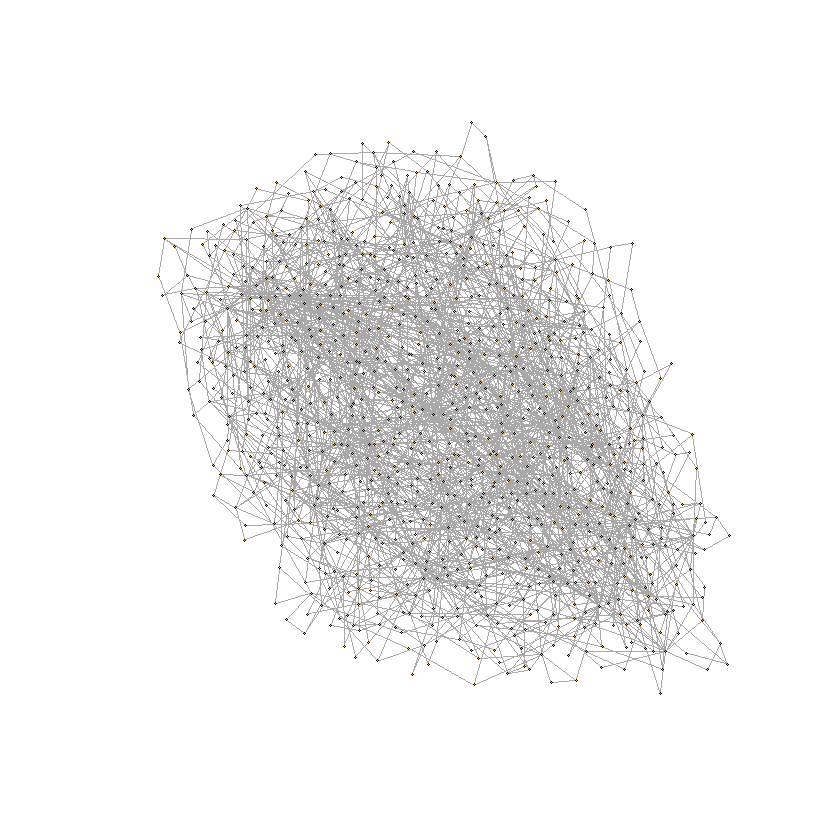

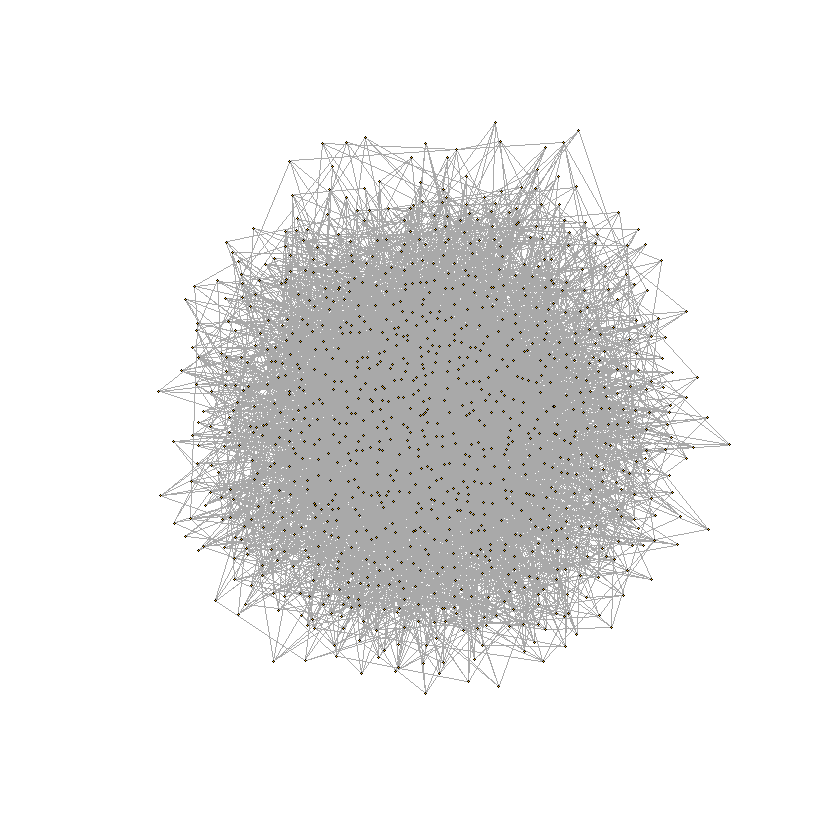

In [10]:
# let's plot the graph for reference
plot(g_2m_1000n, vertex.size=1, vertex.label=NA)
plot(g_5m_1000n, vertex.size=1, vertex.label=NA)

In [11]:
clusters_2m_1000n <- cluster_fast_greedy(g_2m_1000n)
clusters_5m_1000n <- cluster_fast_greedy(g_5m_1000n)
print(modularity(clusters_2m_1000n))
print(modularity(clusters_5m_1000n))

[1] 0.5271631
[1] 0.2771637


It can be seen that with the increasing $m$, the network changes its structure. Instead of a collection of big clusters, the network itself becomes one gigantic cluster, where elements are strongly connected (not fat-tailed distribution). This makes harder for the fast greedy algorithm to minimize the number of edges lying in-between clusters. This results in lowered modularity.

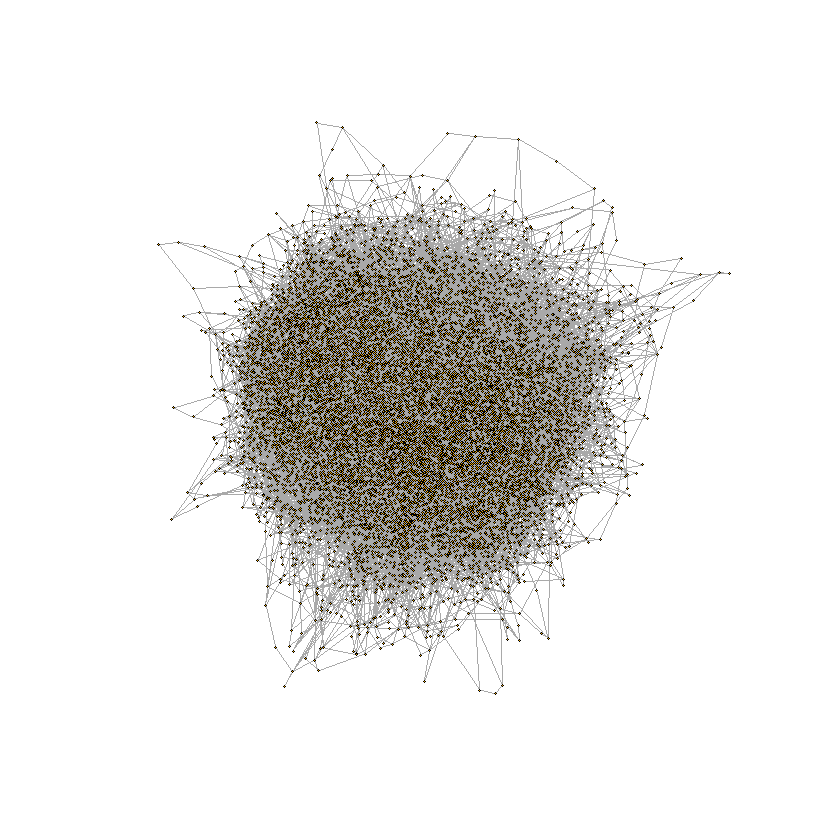

[1] 0.529787
[1] 0.2728815


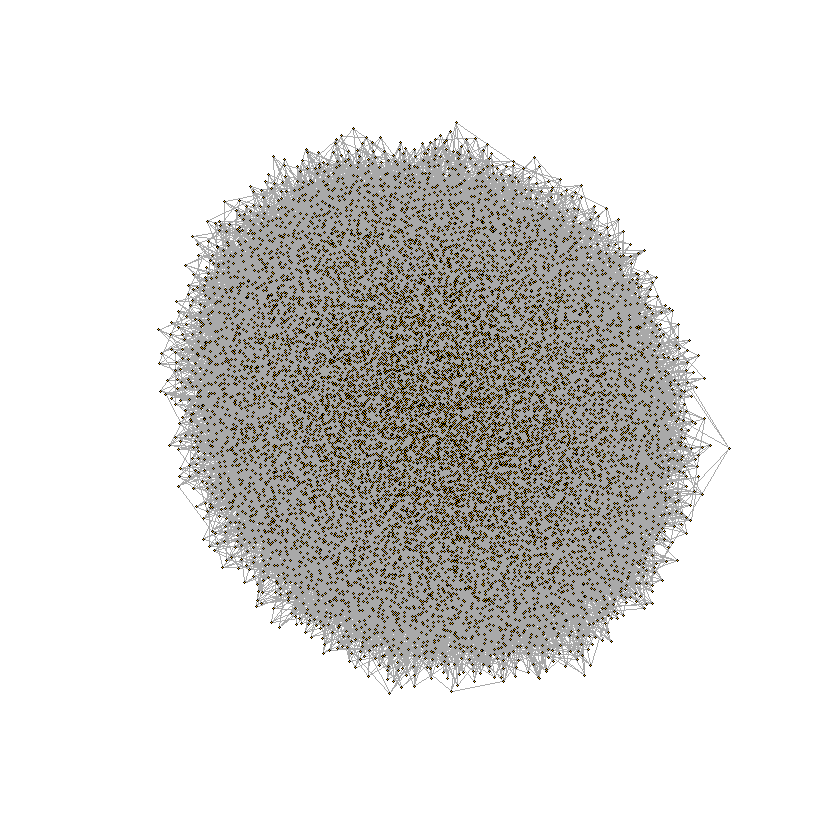

In [19]:
g_2m_10000n <- sample_pa(10000, m=2, directed=FALSE)
g_5m_10000n <- sample_pa(10000, m=5, directed=FALSE)
# let's plot the graph for reference
plot(g_2m_10000n, vertex.size=1, vertex.label=NA)
plot(g_5m_10000n, vertex.size=1, vertex.label=NA)
# compute modularity
clusters_2m_10000n <- cluster_fast_greedy(g_2m_10000n)
clusters_5m_10000n <- cluster_fast_greedy(g_5m_10000n)
print(modularity(clusters_2m_10000n))
print(modularity(clusters_5m_10000n))

Modularity remains the same for larger networks. Seemingly, at this point the size does not affect clusterization quality much.

png 
  2


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1504 -0.3870  0.1653  0.3894  0.9430 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.4074     0.3493   1.166    0.254    
X            -2.1332     0.1277 -16.701 4.52e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5342 on 25 degrees of freedom
Multiple R-squared:  0.9177,	Adjusted R-squared:  0.9145 
F-statistic: 278.9 on 1 and 25 DF,  p-value: 4.524e-15


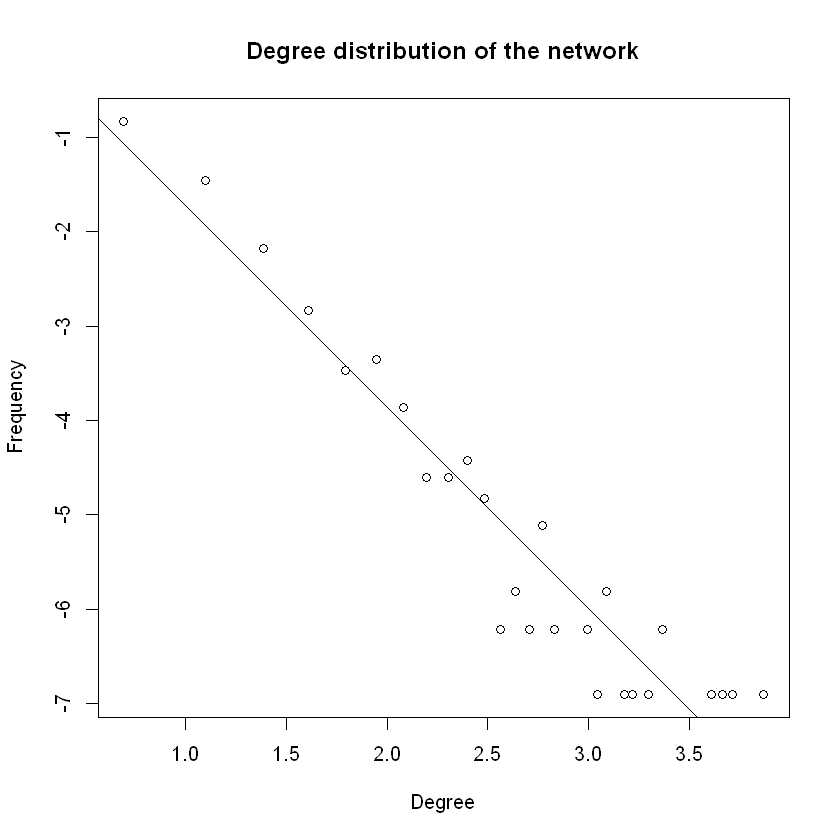

In [59]:
# get degrees present in a net along with frequencies with which they appear
degrees <- seq_along(degree.distribution(g_2m_1000n)) - 1
distribution <- degree.distribution(g_2m_1000n)
# convert them to collections and then to matrices
X <- matrix(c(degrees), byrow=TRUE, nrow=1)
Y <- matrix(c(distribution), byrow=TRUE, nrow=1)
# delete entries with zero frequencies from both matrices
# this allows to avoid - infinity values after log scaling and makes sense
# as these data is not actually present in the net
indices = which(Y!=0,arr.ind = T)
X <- X[indices]
Y <- Y[indices]
# log scale data
X <- log(X)
Y <- log(Y)
# select how many elements you want to delete from the end to avoid outliners
delete <- 0
# calculate len of the desired array
len <- size(X)[2] - delete
# get the slices of both matrices
X <- X[0:len]
Y <- Y[0:len]
# train linear regression model on the data
model = lm(Y ~ X)
# plot for reference
plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

# save plot
png(file="plots/1_2_g_2m_1000n.png", width=600, height=450)

plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

dev.off()

# print model summary
# coefficient we are looking for is X estimate. 
summary(model)

png 
  2


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5207 -0.4664  0.1197  0.4640  1.2626 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.9400     0.4303   2.184   0.0337 *  
X            -1.9419     0.1240 -15.654   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6923 on 50 degrees of freedom
Multiple R-squared:  0.8305,	Adjusted R-squared:  0.8272 
F-statistic: 245.1 on 1 and 50 DF,  p-value: < 2.2e-16


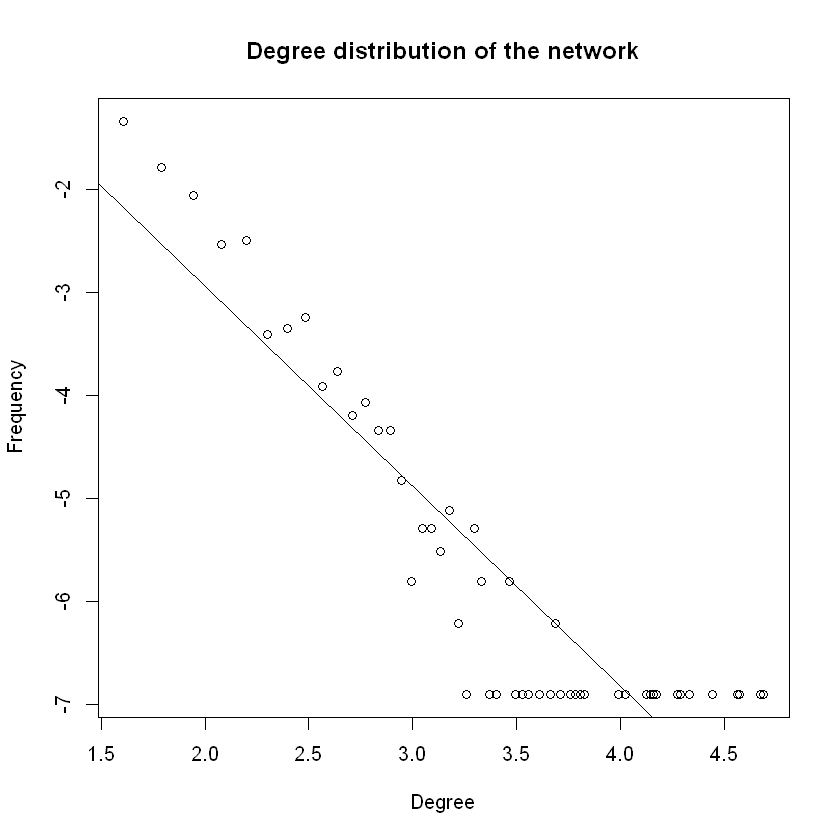

In [56]:
# get degrees present in a net along with frequencies with which they appear
degrees <- seq_along(degree.distribution(g_5m_1000n)) - 1
distribution <- degree.distribution(g_5m_1000n)
# convert them to collections and then to matrices
X <- matrix(c(degrees), byrow=TRUE, nrow=1)
Y <- matrix(c(distribution), byrow=TRUE, nrow=1)
# delete entries with zero frequencies from both matrices
# this allows to avoid - infinity values after log scaling and makes sense
# as these data is not actually present in the net
indices = which(Y!=0,arr.ind = T)
X <- X[indices]
Y <- Y[indices]
# log scale data
X <- log(X)
Y <- log(Y)
# select how many elements you want to delete from the end to avoid outliners
delete <- 0
# calculate len of the desired array
len <- size(X)[2] - delete
# get the slices of both matrices
X <- X[0:len]
Y <- Y[0:len]
# train linear regression model on the data
model = lm(Y ~ X)
# plot for reference
plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

# save plot
png(file="plots/1_2_g_5m_1000n.png", width=600, height=450)

plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

dev.off()

# print model summary
# coefficient we are looking for is X estimate. 
summary(model)

png 
  2


Call:
lm(formula = Y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29758 -0.43686  0.00464  0.44254  2.10942 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.2930     0.3358   0.873    0.387    
X            -2.2398     0.1002 -22.353   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6829 on 48 degrees of freedom
Multiple R-squared:  0.9124,	Adjusted R-squared:  0.9105 
F-statistic: 499.6 on 1 and 48 DF,  p-value: < 2.2e-16


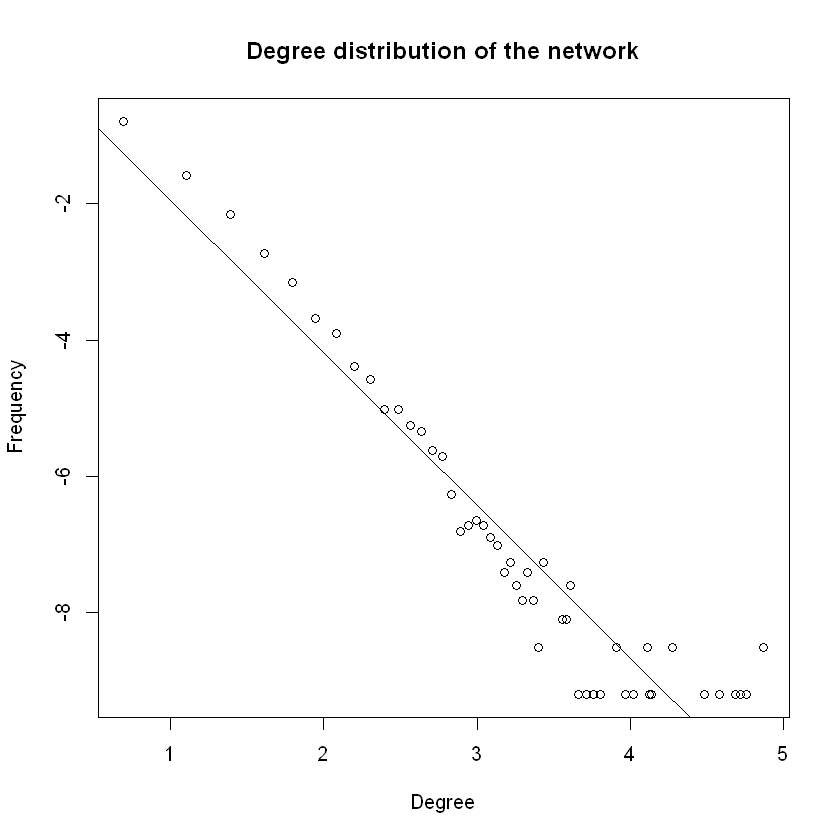

In [57]:
# get degrees present in a net along with frequencies with which they appear
degrees <- seq_along(degree.distribution(g_2m_10000n)) - 1
distribution <- degree.distribution(g_2m_10000n)
# convert them to collections and then to matrices
X <- matrix(c(degrees), byrow=TRUE, nrow=1)
Y <- matrix(c(distribution), byrow=TRUE, nrow=1)
# delete entries with zero frequencies from both matrices
# this allows to avoid - infinity values after log scaling and makes sense
# as these data is not actually present in the net
indices = which(Y!=0,arr.ind = T)
X <- X[indices]
Y <- Y[indices]
# log scale data
X <- log(X)
Y <- log(Y)
# select how many elements you want to delete from the end to avoid outliners
delete <- 0
# calculate len of the desired array
len <- size(X)[2] - delete
# get the slices of both matrices
X <- X[0:len]
Y <- Y[0:len]
# train linear regression model on the data
model = lm(Y ~ X)
# plot for reference
plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

# save plot
png(file="plots/1_2_g_2m_10000n.png", width=600, height=450)

plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

dev.off()

# print model summary
# coefficient we are looking for is X estimate. 
summary(model)

png 
  2


Call:
lm(formula = Y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.84214 -0.48879  0.04245  0.39906  2.14833 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.21920    0.34198   3.565 0.000545 ***
X           -2.18408    0.08419 -25.941  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7646 on 107 degrees of freedom
Multiple R-squared:  0.8628,	Adjusted R-squared:  0.8615 
F-statistic:   673 on 1 and 107 DF,  p-value: < 2.2e-16


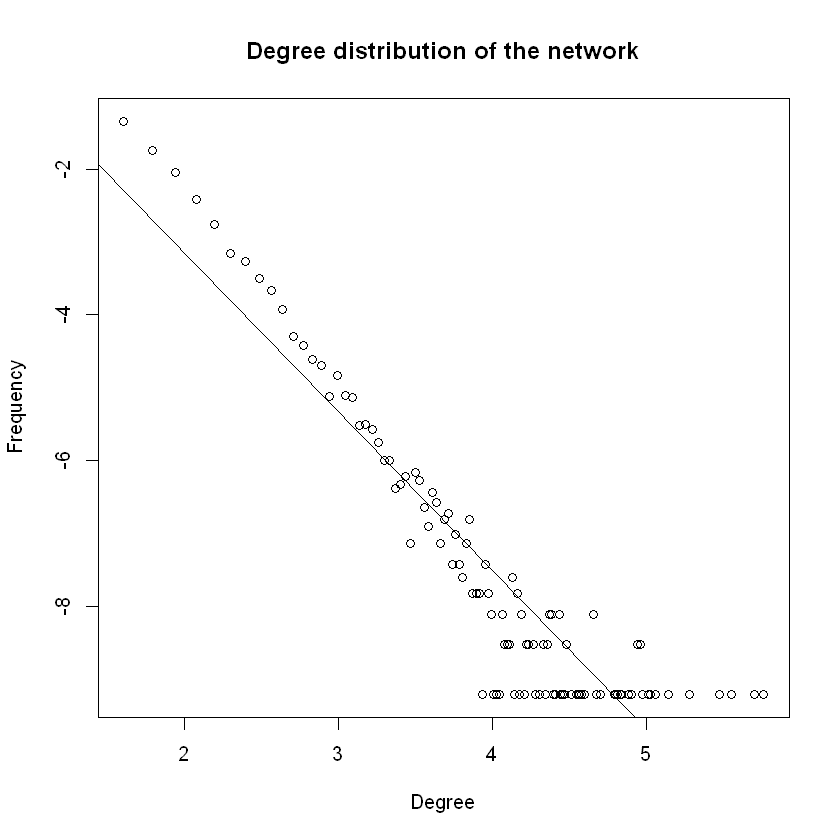

In [58]:
# get degrees present in a net along with frequencies with which they appear
degrees <- seq_along(degree.distribution(g_5m_10000n)) - 1
distribution <- degree.distribution(g_5m_10000n)
# convert them to collections and then to matrices
X <- matrix(c(degrees), byrow=TRUE, nrow=1)
Y <- matrix(c(distribution), byrow=TRUE, nrow=1)
# delete entries with zero frequencies from both matrices
# this allows to avoid - infinity values after log scaling and makes sense
# as these data is not actually present in the net
indices = which(Y!=0,arr.ind = T)
X <- X[indices]
Y <- Y[indices]
# log scale data
X <- log(X)
Y <- log(Y)
# select how many elements you want to delete from the end to avoid outliners
delete <- 0
# calculate len of the desired array
len <- size(X)[2] - delete
# get the slices of both matrices
X <- X[0:len]
Y <- Y[0:len]
# train linear regression model on the data
model = lm(Y ~ X)
# plot for reference
plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

# save plot
png(file="plots/1_2_g_5m_10000n.png", width=600, height=450)

plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

dev.off()

# print model summary
# coefficient we are looking for is X estimate. 
summary(model)

Trends we are observing are similar to ones in the question **d)**, in other words, $b(n=10000) > b(n=1000)$. However, for any $n$:

$$b(m = 5) < b(m = 2) < b(m=1)$$

We can suppose that for higher values of $m$ convergense to steady state is slower.

[1] 115



Call:
lm(formula = Y[mask] ~ X[mask])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7932 -0.5802  0.3797  0.7374  1.0921 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0341     0.3741   2.764  0.00671 ** 
X[mask]      -2.4722     0.0973 -25.407  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9481 on 108 degrees of freedom
Multiple R-squared:  0.8567,	Adjusted R-squared:  0.8553 
F-statistic: 645.5 on 1 and 108 DF,  p-value: < 2.2e-16


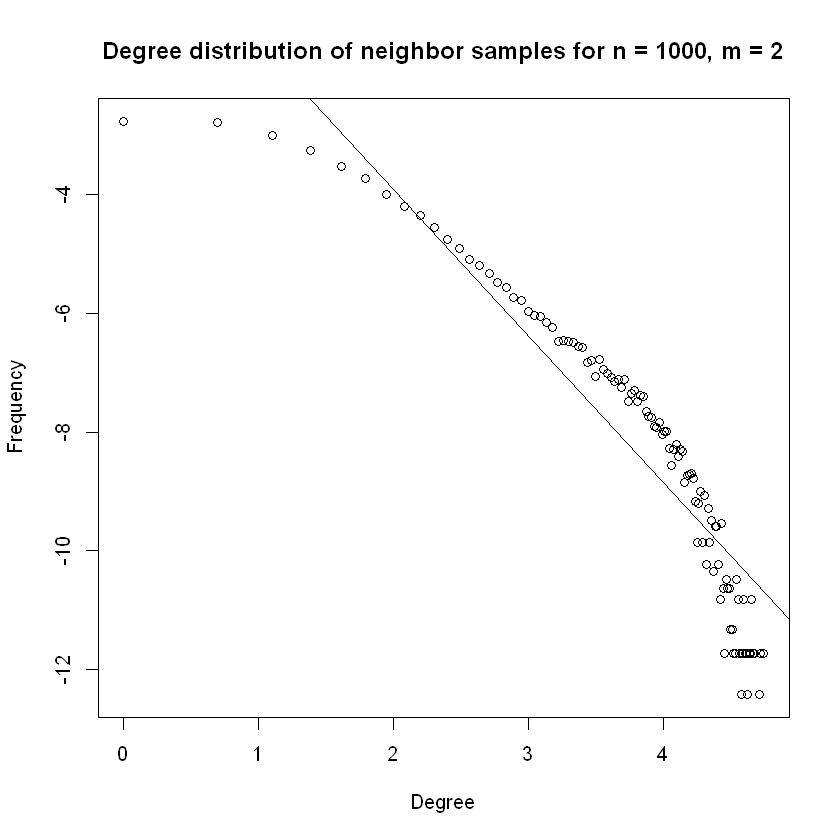

In [95]:
numOfExamples = 50
numOfGraphs = 5000

v = 1
num = 0
transition_matrix = create_transition_matrix(g2)
PMF = transition_matrix[1, ]
degreeSecondGraph = matrix(data = 0, nrow = numOfGraphs*numOfExamples, ncol = 1)



for(k in 1:numOfGraphs){
    g2 <- sample_pa(1000, m=2, directed=FALSE)
    for(i in 1:numOfExamples){
             v = sample(1:vcount(g2), 1)
             j = neighbors(g2, v, mode = c("all"))
             #print(j)
             #print(v)
             size = length(j)
             #print("Size: ")
             #print(size)
             num = sample(1:size, 1)
             if (num == 0) {
                num = 1
                }
             #print("Num: ")
             #print(num)

             degreeSecondGraph[i*k] = degree(g2,j[num])
            }
    
}
print(max(degreeSecondGraph))
X = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)
freqSecond = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)

for(i in 1:(numOfExamples*numOfGraphs)){
    freqSecond[degreeSecondGraph[i]] = freqSecond[degreeSecondGraph[i]] + 1
    X[i] = i 
}
inc = 0
#print(freqSecond)
for(i in 1:max(degreeSecondGraph)){
    if(freqSecond[i] != 0){
        inc = inc + 1
        freqSecond[inc] = freqSecond[i]
        X[inc] = i
        } 
    }
freqSecond = freqSecond/(numOfExamples*numOfGraphs)
#print(freqSecond)
Y <- log(freqSecond)
X <- log(idx <- seq(from = 1, to = length(Y), by = 1))


for (i in 1:length(Y)){
    if(Y[i] == -Inf){
        Y[i] = 0
    }   
}

mask <- generate_mask(Y)


model = lm(Y[mask] ~ X[mask])
plot(X[mask], Y[mask],
     main="Degree distribution of neighbor samples for n = 1000, m = 2",
     xlab="Degree",
     ylab="Frequency",)
abline(model)
summary(model)

[1] 285



Call:
lm(formula = Y[mask] ~ X[mask])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2297 -0.1351  0.1545  0.2832  0.9504 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.47036    0.16863   2.789  0.00574 ** 
X[mask]     -2.21953    0.03713 -59.781  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5353 on 224 degrees of freedom
Multiple R-squared:  0.941,	Adjusted R-squared:  0.9408 
F-statistic:  3574 on 1 and 224 DF,  p-value: < 2.2e-16


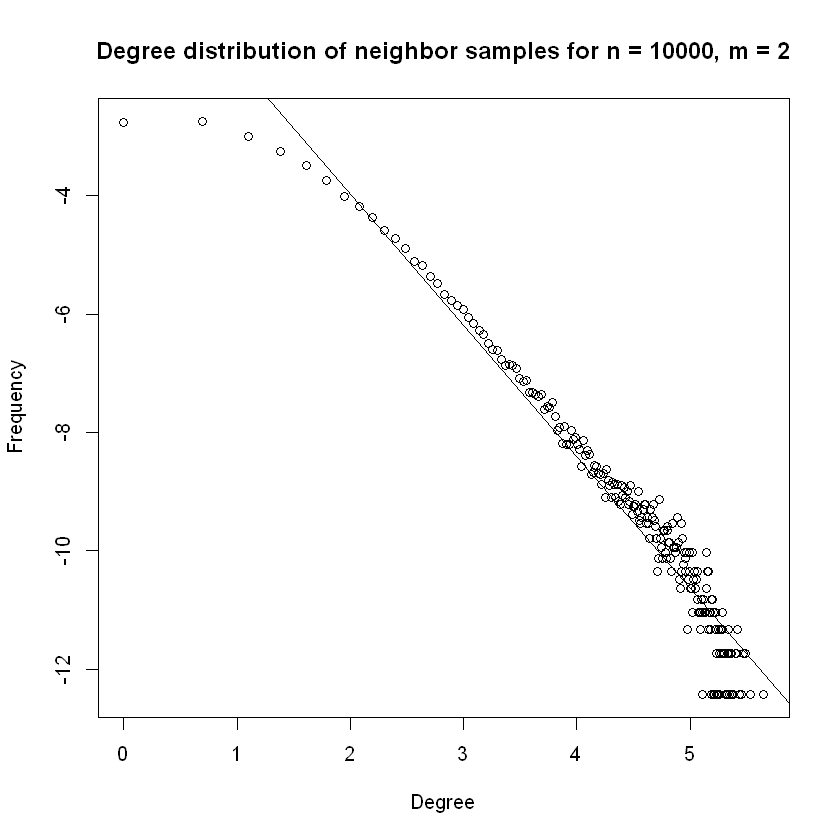

In [96]:
numOfExamples = 50
numOfGraphs = 5000

v = 1
num = 0
transition_matrix = create_transition_matrix(g2)
PMF = transition_matrix[1, ]
degreeSecondGraph = matrix(data = 0, nrow = numOfGraphs*numOfExamples, ncol = 1)



for(k in 1:numOfGraphs){
    g2 <- sample_pa(10000, m=2, directed=FALSE)
    for(i in 1:numOfExamples){
             v = sample(1:vcount(g2), 1)
             j = neighbors(g2, v, mode = c("all"))
             #print(j)
             #print(v)
             size = length(j)
             #print("Size: ")
             #print(size)
             num = sample(1:size, 1)
             if (num == 0) {
                num = 1
                }
             #print("Num: ")
             #print(num)

             degreeSecondGraph[i*k] = degree(g2,j[num])
            }
    
}
print(max(degreeSecondGraph))
X = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)
freqSecond = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)

for(i in 1:(numOfExamples*numOfGraphs)){
    freqSecond[degreeSecondGraph[i]] = freqSecond[degreeSecondGraph[i]] + 1
    X[i] = i 
}
inc = 0
#print(freqSecond)
for(i in 1:max(degreeSecondGraph)){
    if(freqSecond[i] != 0){
        inc = inc + 1
        freqSecond[inc] = freqSecond[i]
        X[inc] = i
        } 
    }
freqSecond = freqSecond/(numOfExamples*numOfGraphs)
#print(freqSecond)
Y <- log(freqSecond)
X <- log(idx <- seq(from = 1, to = length(Y), by = 1))


for (i in 1:length(Y)){
    if(Y[i] == -Inf){
        Y[i] = 0
    }   
}

mask <- generate_mask(Y)


model = lm(Y[mask] ~ X[mask])
plot(X[mask], Y[mask],
     main="Degree distribution of neighbor samples for n = 10000, m = 2",
     xlab="Degree",
     ylab="Frequency",)
abline(model)
summary(model)

[1] 113



Call:
lm(formula = Y[mask] ~ X[mask])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5804 -0.4104  0.4022  0.6874  0.9680 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.82100    0.37826    2.17   0.0323 *  
X[mask]     -2.39322    0.09975  -23.99   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9431 on 102 degrees of freedom
Multiple R-squared:  0.8495,	Adjusted R-squared:  0.848 
F-statistic: 575.7 on 1 and 102 DF,  p-value: < 2.2e-16


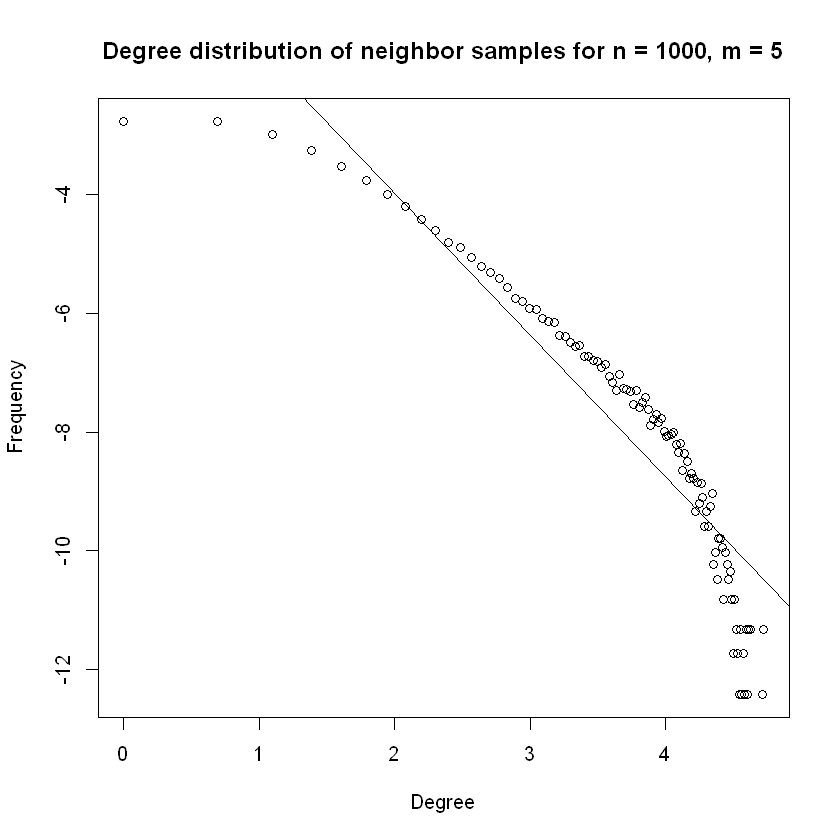

In [92]:
numOfExamples = 50
numOfGraphs = 5000
g2 <- sample_pa(1000, m=5, directed=FALSE)
v = 1
num = 0
transition_matrix = create_transition_matrix(g2)
PMF = transition_matrix[1, ]
degreeSecondGraph = matrix(data = 0, nrow = numOfGraphs*numOfExamples, ncol = 1)



for(k in 1:numOfGraphs){
    g2 <- sample_pa(1000, m=2, directed=FALSE)
    for(i in 1:numOfExamples){
             v = sample(1:vcount(g2), 1)
             j = neighbors(g2, v, mode = c("all"))
             #print(j)
             #print(v)
             size = length(j)
             #print("Size: ")
             #print(size)
             num = sample(1:size, 1)
             if (num == 0) {
                num = 1
                }
             #print("Num: ")
             #print(num)

             degreeSecondGraph[i*k] = degree(g2,j[num])
            }
    
}
print(max(degreeSecondGraph))
X = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)
freqSecond = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)

for(i in 1:(numOfExamples*numOfGraphs)){
    freqSecond[degreeSecondGraph[i]] = freqSecond[degreeSecondGraph[i]] + 1
    X[i] = i 
}
inc = 0
#print(freqSecond)
for(i in 1:max(degreeSecondGraph)){
    if(freqSecond[i] != 0){
        inc = inc + 1
        freqSecond[inc] = freqSecond[i]
        X[inc] = i
        } 
    }
freqSecond = freqSecond/(numOfExamples*numOfGraphs)
#print(freqSecond)
Y <- log(freqSecond)
X <- log(idx <- seq(from = 1, to = length(Y), by = 1))


for (i in 1:length(Y)){
    if(Y[i] == -Inf){
        Y[i] = 0
    }   
}

mask <- generate_mask(Y)


model = lm(Y[mask] ~ X[mask])
plot(X[mask], Y[mask],
     main="Degree distribution of neighbor samples for n = 1000, m = 5",
     xlab="Degree",
     ylab="Frequency",)
abline(model)
summary(model)

[1] 171



Call:
lm(formula = Y[mask] ~ X[mask])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0872 -0.5597  0.4818  0.9087  1.3400 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.9795     0.4447   2.203   0.0291 *  
X[mask]      -2.2019     0.1059 -20.792   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.261 on 157 degrees of freedom
Multiple R-squared:  0.7336,	Adjusted R-squared:  0.7319 
F-statistic: 432.3 on 1 and 157 DF,  p-value: < 2.2e-16


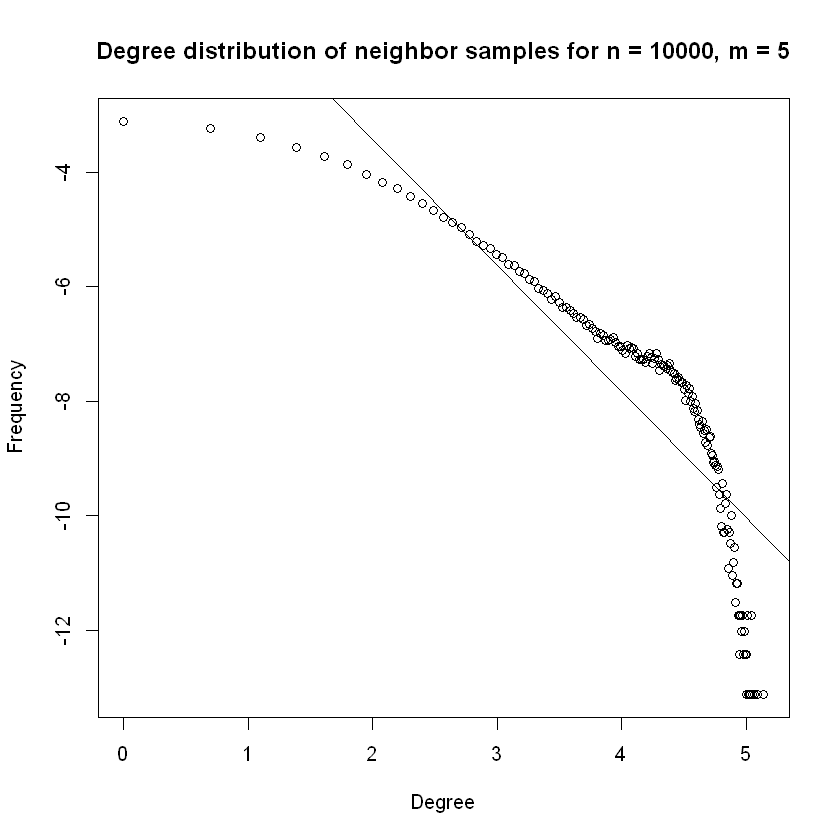

In [98]:
numOfExamples = 50
numOfGraphs = 10000

v = 1
num = 0
transition_matrix = create_transition_matrix(g2)
PMF = transition_matrix[1, ]
degreeSecondGraph = matrix(data = 0, nrow = numOfGraphs*numOfExamples, ncol = 1)



for(k in 1:numOfGraphs){
    g2 <- sample_pa(1000, m=5, directed=FALSE)
    for(i in 1:numOfExamples){
             v = sample(1:vcount(g2), 1)
             j = neighbors(g2, v, mode = c("all"))
             #print(j)
             #print(v)
             size = length(j)
             #print("Size: ")
             #print(size)
             num = sample(1:size, 1)
             if (num == 0) {
                num = 1
                }
             #print("Num: ")
             #print(num)

             degreeSecondGraph[i*k] = degree(g2,j[num])
            }
    
}
print(max(degreeSecondGraph))
X = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)
freqSecond = matrix(data = 0, nrow = max(degreeSecondGraph), ncol = 1)

for(i in 1:(numOfExamples*numOfGraphs)){
    freqSecond[degreeSecondGraph[i]] = freqSecond[degreeSecondGraph[i]] + 1
    X[i] = i 
}
inc = 0
#print(freqSecond)
for(i in 1:max(degreeSecondGraph)){
    if(freqSecond[i] != 0){
        inc = inc + 1
        freqSecond[inc] = freqSecond[i]
        X[inc] = i
        } 
    }
freqSecond = freqSecond/(numOfExamples*numOfGraphs)
#print(freqSecond)
Y <- log(freqSecond)
X <- log(idx <- seq(from = 1, to = length(Y), by = 1))


for (i in 1:length(Y)){
    if(Y[i] == -Inf){
        Y[i] = 0
    }   
}

mask <- generate_mask(Y)


model = lm(Y[mask] ~ X[mask])
plot(X[mask], Y[mask],
     main="Degree distribution of neighbor samples for n = 10000, m = 5",
     xlab="Degree",
     ylab="Frequency",)
abline(model)
summary(model)

**h)** Again, generate a preferential attachment network with $n = 1000$, $m = 1$. Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two procedures for creating random power-law networks.

**Hint** In case that fastgreedy community detection fails because of self-loops, you may use "walktrap" community detection. 

[1] 0.9337886


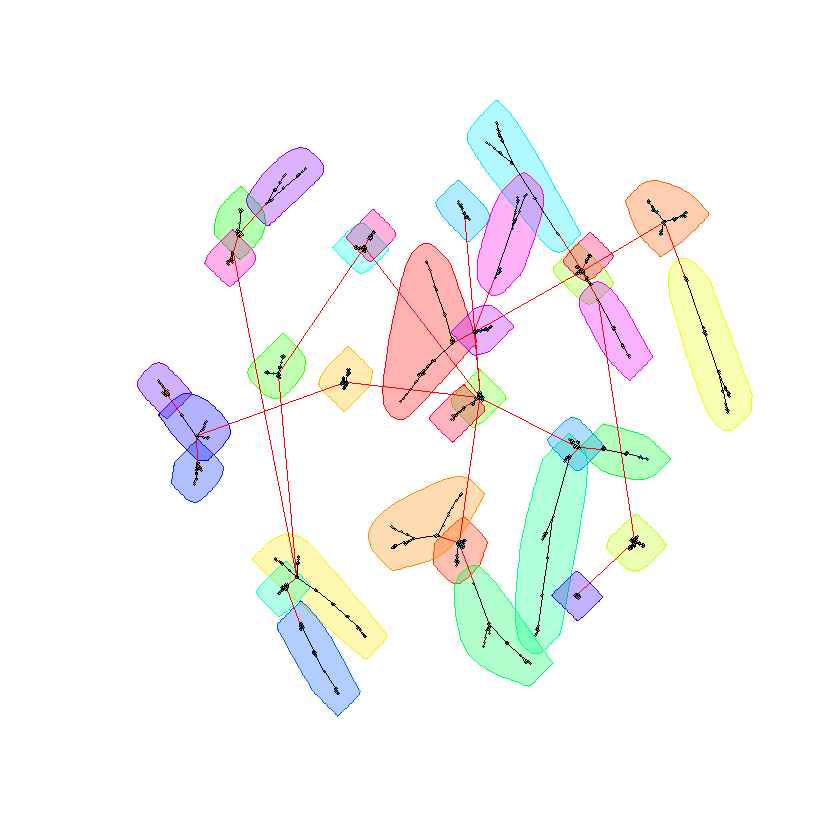

In [3]:
g <- sample_pa(1000, m=1, directed=FALSE)
clusters <- cluster_fast_greedy(g)
print(modularity(clusters))
plot(clusters,g, vertex.size=1, vertex.label=NA)


[1] 0.7429708


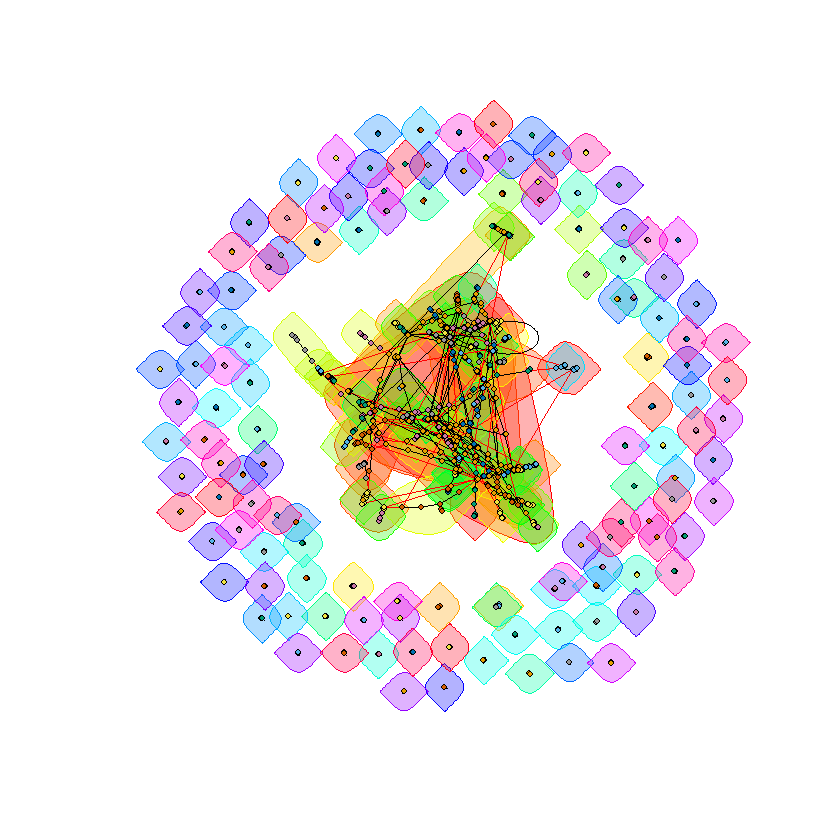

In [4]:
degSeq = matrix(data = 0, nrow = 1, ncol = 1)
for(i in 1:1000){
        
         degSeq[i] = degree(g, v = i)
         
        }
g1 <- sample_degseq(degSeq,  method = c("simple"))
clusters2 <- cluster_walktrap(g1)
print(modularity(clusters2))
plot(clusters2,g1, vertex.size=2, vertex.label=NA)